In [39]:
#importing necessary lilbraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#load the dataset
df = pd.read_csv('Twitter_Data.csv')

In [66]:
#Check column names
print(df.columns)

Index(['clean_text', 'category'], dtype='object')


In [65]:
#Check for any NaN values in the columns
print(df.isnull().sum())

clean_text    0
category      0
dtype: int64


In [74]:
# Drop rows with missing values in relevant columns (text and target)
df = df.dropna(subset=['clean_text', 'category'])  # Adjust column names accordingly

In [75]:
#Optional: Clean the text data further (if needed)
# Remove special characters, numbers, and unnecessary spaces
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)).lower().strip())

In [76]:
#Define the features (X) and target (y)
X = df['clean_text']  # Input features (text data)
y = df['category']    # Target labels (sentiment categories)

In [77]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
#Convert text data to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust the max_features as per your dataset
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [79]:
#Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [80]:
#Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)

In [81]:
#Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.44862709004448537
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.01      0.02      7230
         0.0       1.00      0.01      0.03     10961
         1.0       0.44      1.00      0.62     14404

    accuracy                           0.45     32595
   macro avg       0.81      0.34      0.22     32595
weighted avg       0.75      0.45      0.29     32595



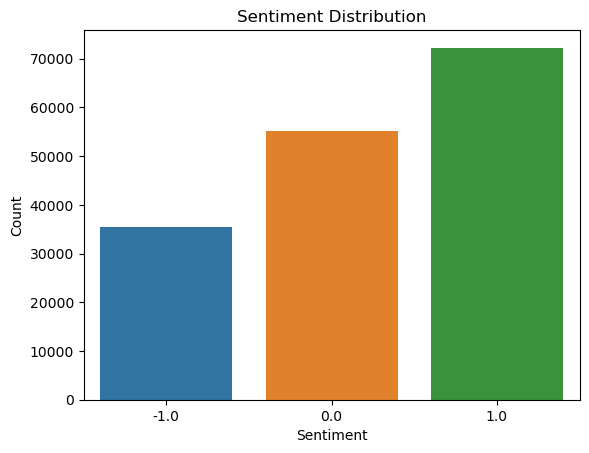

In [82]:
#Visualize sentiment distribution (optional)
sns.countplot(x='category', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

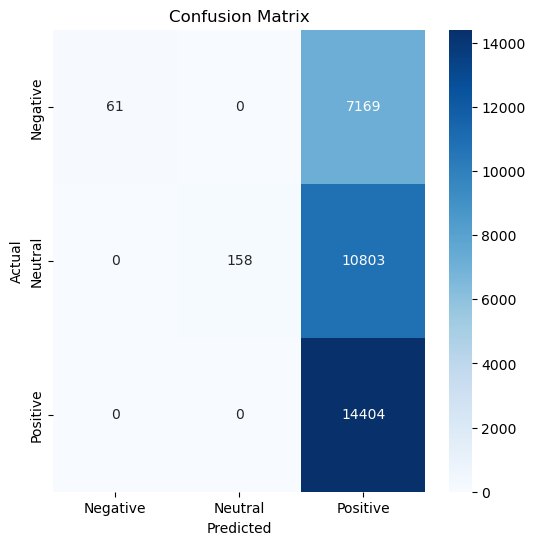

In [84]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()